In [1]:
from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100


from datetime import datetime
str(datetime.now())



'2018-06-02 08:56:50.467507'

In [2]:
df = pd.read_excel('../../measurements/ECCC/LakeErie_Markelov_Dove26May2017.xlsx', sheetname='Data')

In [3]:
df.columns

Index(['CRUISE_PLAN', 'CRUISE_START_DATE', 'CRUISE_STOP_DATE',
       'LAST_DATE_UPDATED', 'WATER_BODY', 'CSN', 'LATITUDE_DD', 'LONGITUDE_DD',
       'PSN', 'SOUNDING', 'STN_DATE', 'CODE', 'DEPTH_FROM', 'DEPTH_TO',
       'DETECTION', 'FLAG', 'SEQ_NO', 'VALUE', 'ABBREV', 'FULL_NAME', 'UNITS'],
      dtype='object')

In [4]:
df.groupby(['FULL_NAME'])['STN_DATE'].nunique()

FULL_NAME
ALUMINUM                                    110
ALUMINUM                                     19
AMMONIA FIL. INTEGRATED                      61
AMMONIA NITROGEN, SOLUBLE                   173
AMMONIA NITROGEN,SOLUBLE                    681
CALCIUM                                     357
CALCIUM,FILTERED                            105
CALCIUM,FILTERED ATOMIC ABS.               1024
CARBON,DISSOLVED ORGANIC                    445
CARBON,PARTICULATE ORGANIC                  468
CARBON,PARTICULATE ORGANIC,INTEGRATED      1406
CHLORIDE                                    881
CHLORIDE,FILTERED                           613
CHLOROPHYL A, UNCORRECTED                   254
CHLOROPHYLL A CORRECTED INTEGRATED         1326
CHLOROPHYLL A UNCORRECTED INTEGRATED       1402
CHLOROPHYLL A, CORRECTED PHAEOPHYTIN        246
DISSOLVED INORGANIC CARBON                  280
DISSOLVED OXYGEN, PROFILER WQP              642
FLUORIDE                                    625
I-NO3+2F NITRITE + NITRITE FIL

In [5]:
df['year']=pd.to_datetime(pd.DatetimeIndex(df['CRUISE_STOP_DATE'])).year
df['month']=pd.to_datetime(pd.DatetimeIndex(df['CRUISE_STOP_DATE'])).month

In [14]:
df.columns

Index(['CRUISE_PLAN', 'CRUISE_START_DATE', 'CRUISE_STOP_DATE',
       'LAST_DATE_UPDATED', 'WATER_BODY', 'CSN', 'LATITUDE_DD', 'LONGITUDE_DD',
       'PSN', 'SOUNDING', 'STN_DATE', 'CODE', 'DEPTH_FROM', 'DEPTH_TO',
       'DETECTION', 'FLAG', 'SEQ_NO', 'VALUE', 'ABBREV', 'FULL_NAME', 'UNITS',
       'year', 'month'],
      dtype='object')

In [48]:
western_basin = ['971', '973', '974', '970', 'er61', 'er91', '966', '968', '969']
western_basin = [971, 973, 974, 970, 966, 968, 969]

### Western Basin

In [66]:
sp_name='PHOSPHORUS,TOTAL FILTERED'
wb = (df['PSN'] == 969) |( df['PSN'] == 968) | (df['PSN'] == 966) | (df['PSN'] == 970) |(df['PSN'] == 974) |(df['PSN'] == 973) | (df['PSN'] == 973)
df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


count      mean       std     min       25%      50%       75%  \
year month                                                                   
1994 4       10.0  0.010260  0.009619  0.0006  0.005900  0.00750  0.009300   
     7       15.0  0.004687  0.001408  0.0003  0.004350  0.00500  0.005450   
     10       9.0  0.007889  0.005951  0.0004  0.003000  0.00970  0.009900   
1995 4        7.0  0.007800  0.005060  0.0027  0.003600  0.00580  0.011900   
     8       18.0  0.004839  0.003144  0.0003  0.002850  0.00455  0.007450   
     10      15.0  0.010973  0.007465  0.0007  0.006200  0.00980  0.012950   
1998 4        7.0  0.023700  0.031488  0.0035  0.005950  0.01030  0.024750   
     7       16.0  0.005906  0.002666  0.0002  0.004975  0.00605  0.006800   
2000 4        5.0  0.004020  0.003389  0.0002  0.000500  0.00570  0.006600   
     9       18.0  0.005561  0.003425  0.0003  0.004150  0.00540  0.007350   
2002 4        7.0  0.020829  0.028983  0.0032  0.005100  0.00930  0.019900   
     8       18.0  0.006122  0.003987  0.0002  0.004100  0.00645  0.008075   
2004 4        5.0  0.006860  0.008228  0.0005  0.000500  0.00580  0.006900   
     8       12.0  0.005308  0.002526  0.0025  0.003475  0.00445  0.006875   
2006 4        7.0  0.005971  0.002798  0.0029  0.003900  0.00620  0.006850   
     8        9.0  0.008833  0.011963  0.0037  0.004400  0.00470  0.005300   
2007 4        6.0  0.010767  0.003562  0.0053  0.008475  0.01215  0.013350   
2009 4       13.0  0.011554  0.010388  0.0005  0.000600  0.00860  0.019200   
     7        8.0  0.007162  0.004098  0.0026  0.004025  0.00735  0.008050   
2010 7       13.0  0.005131  0.002815  0.0005  0.003200  0.00520  0.007200   
2012 5       25.0  0.004332  0.001682  0.0005  0.003400  0.00450  0.005000   
     7        7.0  0.005829  0.002536  0.0036  0.003900  0.00440  0.007700   

               max  
year month          
1994 4      0.0298  
     7      0.0061  
     10     0.0174  
1995 4      0.0151  
     8      0.0096  
     10     0.0233  
1998 4      0.0907  
     7      0.0099  
2000 4      0.0071  
     9      0.0119  
2002 4      0.0833  
     8      0.0162  
2004 4      0.0206  
     8      0.0103  
2006 4      0.0112  
     8      0.0406  
2007 4      0.0140  
2009 4      0.0288  
     7      0.0153  
2010 7      0.0089  
2012 5      0.0079  
     7      0.0096

In [67]:
units = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
fn='western_basin_'+sp_name+'_'+units
fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [68]:
sp_name='PHOSPHOROUS,SOLUBLE REACTIVE,FILTERED'
res = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
res

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,,count,mean,std,min,25%,50%,75%,max
year,month,,,,,,,,
1994,4,10.0,0.006540,0.009538,0.0005,0.001250,0.00220,0.004750,0.0274
1995,4,7.0,0.005543,0.005099,0.0007,0.001350,0.00310,0.009600,0.0131
1998,4,7.0,0.021414,0.033064,0.0010,0.001900,0.00630,0.023900,0.0910
2000,4,5.0,0.002120,0.001807,0.0002,0.000200,0.00270,0.003600,0.0039
2002,4,7.0,0.016786,0.027580,0.0002,0.001750,0.00460,0.016650,0.0759
2004,4,5.0,0.005040,0.007273,0.0002,0.000200,0.00340,0.003700,0.0177
2006,4,7.0,0.002329,0.002383,0.0006,0.000800,0.00100,0.002950,0.0072
2007,4,6.0,0.007583,0.004211,0.0015,0.004575,0.00895,0.010475,0.0120
2009,4,13.0,0.009708,0.009560,0.0002,0.000700,0.00550,0.016800,0.0251


In [69]:
units = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
fn='western_basin_'+sp_name+'_'+units
fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [70]:
sp_name='PHOSPHOROUS,TOTAL'
res = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
res

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


count      mean       std     min       25%      50%       75%  \
year month                                                                   
1994 4       10.0  0.041860  0.060196  0.0002  0.012050  0.02515  0.043275   
     7       15.0  0.011927  0.004491  0.0002  0.010600  0.01150  0.014800   
     10       9.0  0.019956  0.015907  0.0002  0.009400  0.01730  0.031000   
1995 4        7.0  0.017800  0.009378  0.0081  0.009550  0.01570  0.025650   
     8       18.0  0.010278  0.006228  0.0002  0.009150  0.01115  0.014300   
     10      15.0  0.022193  0.011133  0.0002  0.016150  0.02730  0.030700   
1998 4        7.0  0.042171  0.044866  0.0103  0.014700  0.02450  0.047950   
     7       17.0  0.015647  0.007903  0.0002  0.012800  0.01800  0.021300   
2000 4        4.0  0.007000  0.009387  0.0002  0.000200  0.00385  0.010650   
     9       18.0  0.014622  0.010168  0.0002  0.012250  0.01510  0.018600   
2002 4        7.0  0.033843  0.044049  0.0109  0.011350  0.01720  0.027050   
     8       18.0  0.013461  0.008576  0.0004  0.009200  0.01415  0.019625   
2004 4        5.0  0.015100  0.018338  0.0005  0.000500  0.01430  0.014800   
     8       12.0  0.021683  0.014350  0.0099  0.011725  0.01790  0.025525   
2006 4        7.0  0.020614  0.012180  0.0090  0.010150  0.01460  0.032700   
     8        9.0  0.016400  0.013520  0.0097  0.010200  0.01150  0.013900   
2007 4        6.0  0.025200  0.011181  0.0125  0.017625  0.02315  0.031825   
2009 4       13.0  0.049000  0.057587  0.0005  0.000500  0.01620  0.064200   
     7        8.0  0.017288  0.006919  0.0082  0.012575  0.01810  0.021175   
2010 7       13.0  0.017608  0.010404  0.0006  0.011500  0.01680  0.027400   
2012 5       25.0  0.015248  0.010138  0.0005  0.010000  0.01260  0.018300   
     7        7.0  0.008657  0.001233  0.0069  0.007700  0.00890  0.009700   

               max  
year month          
1994 4      0.2050  
     7      0.0176  
     10     0.0449  
1995 4      0.0304  
     8      0.0191  
     10     0.0342  
1998 4      0.1351  
     7      0.0231  
2000 4      0.0201  
     9      0.0376  
2002 4      0.1320  
     8      0.0261  
2004 4      0.0454  
     8      0.0605  
2006 4      0.0350  
     8      0.0518  
2007 4      0.0419  
2009 4      0.1620  
     7      0.0261  
2010 7      0.0312  
2012 5      0.0436  
     7      0.0100

In [71]:
units = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
fn='western_basin_'+sp_name+'_'+units
fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [72]:
sp_name='CHLORIDE'
res = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
units = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
fn='western_basin_'+sp_name+'_'+units
fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [75]:
sp_name='CHLOROPHYLL A UNCORRECTED INTEGRATED'
res = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
units = df[df['PSN'].isin(western_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
fn='western_basin_'+sp_name+'_'+units
fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


### Central Basin

In [76]:
central_basin = [965, 962, 961, 954, 953, 952, 949, 945, 946]

In [78]:
sp_names = ['PHOSPHORUS,TOTAL FILTERED', 'PHOSPHOROUS,SOLUBLE REACTIVE,FILTERED', 'PHOSPHOROUS,TOTAL', 'CHLOROPHYLL A UNCORRECTED INTEGRATED', 'CHLORIDE', ]

In [80]:
for sp_name in sp_names:
    res = df[df['PSN'].isin(central_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
    units = df[df['PSN'].isin(central_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
    fn='central_basin_'+sp_name+'_'+units
    fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
    res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


### Eastern Basin

In [82]:
eastern_basin = [448, 940, 879, 938, 450, 449, 451, 452, 447, 936,886,446, 445,934,935,444,441,443,442,440,439,438,931]

In [83]:
for sp_name in sp_names:
    res = df[df['PSN'].isin(eastern_basin)][df['FULL_NAME'] == sp_name].groupby(['year', 'month'])['VALUE'].describe()
    units = df[df['PSN'].isin(eastern_basin)][df['FULL_NAME'] == sp_name].UNITS.unique()[0]
    fn='eastern_basin_'+sp_name+'_'+units
    fn = re.sub('[^0-9a-zA-Z]+', '_', fn)
    res.to_csv(fn+'.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [89]:
df.PSN.unique()

array([ 228,  226,  227,  225,   23,  224,  223,  221,  222,  220,   84,
        298,  271,  216,  218,  291,  268,  281,  357,  215,  214,  213,
        212,  211,  933,  934,  935,  936,  886,  937,  938,  939,  879,
        497,  940,  941,  942,  948,  947,  946,  945,  944,  943,  949,
        950,  951,  952,  888,  953,  889,  954,  880,  955,  956,  958,
        957,  959,  960,  961,  962,  969,  974,  970,  358,  966,  967,
        968,  885,  965,  973,  882,  972,  881,  971,  932,  931,  963,
        964,  887, 1090,  303, 1088, 1134, 1135, 1137, 1136,  342,  341,
        338,  339,  340,  344,  337,  343,  442,  448,  727,  445,  449,
        205,  898,  897,  896,  916,  980,  915,  899,  919,  920,  918,
        491,  492,  493,  311, 1163,  496,  495,  494, 1209, 1210, 1211,
       1212, 1213, 1218, 1217, 1216, 1215, 1214, 1219, 1220, 1221, 1222,
       1223, 1238, 1239, 1240, 1236, 1237, 1053,  452, 1257,   67, 1292,
       1207, 1262, 1326,  733, 1156,  486, 1048])

Text(0,0.5,'TOTP, mg-P/L')

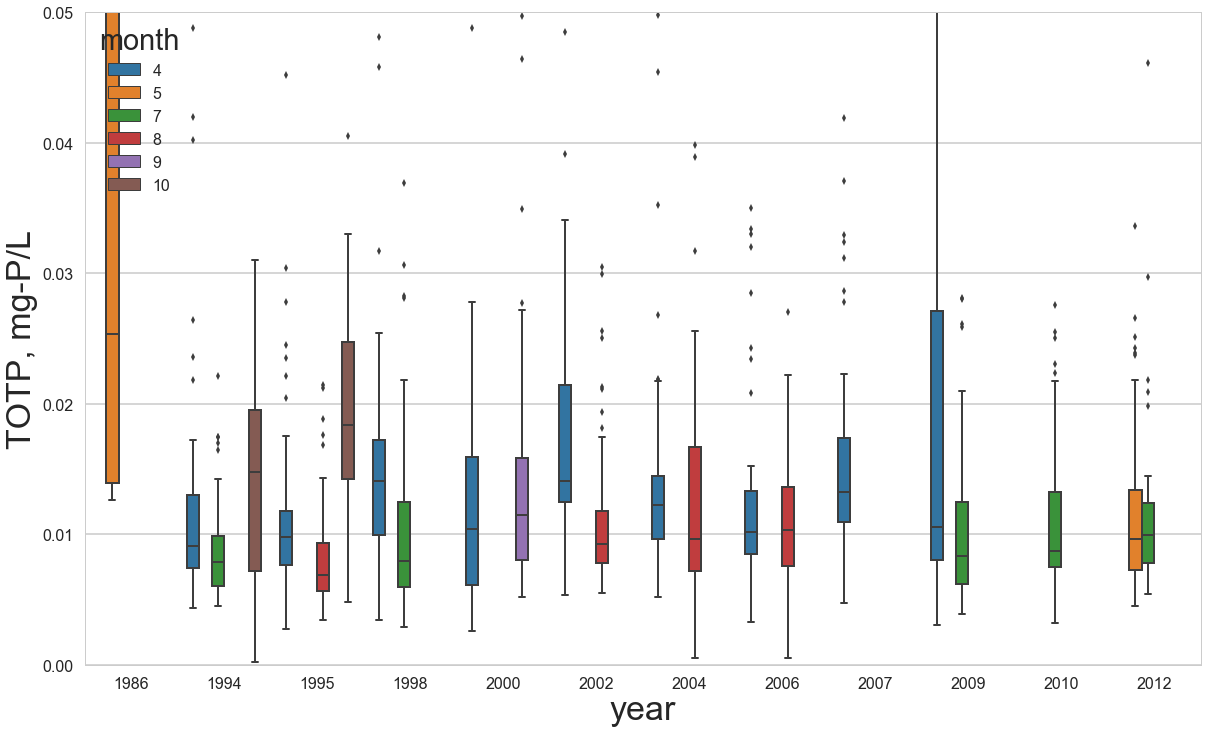

In [9]:
plt.figure(figsize=(20,12))
sns.boxplot(x='year', y='VALUE', hue='month',data=pd.DataFrame(df[df['FULL_NAME'] == 'PHOSPHOROUS,TOTAL'].groupby(['PSN','year', 'month']).mean()[['VALUE']]).reset_index())
plt.ylim(0, 0.05)
plt.ylabel('TOTP, mg-P/L')

Text(0,0.5,'Cl, mg-Cl/L')

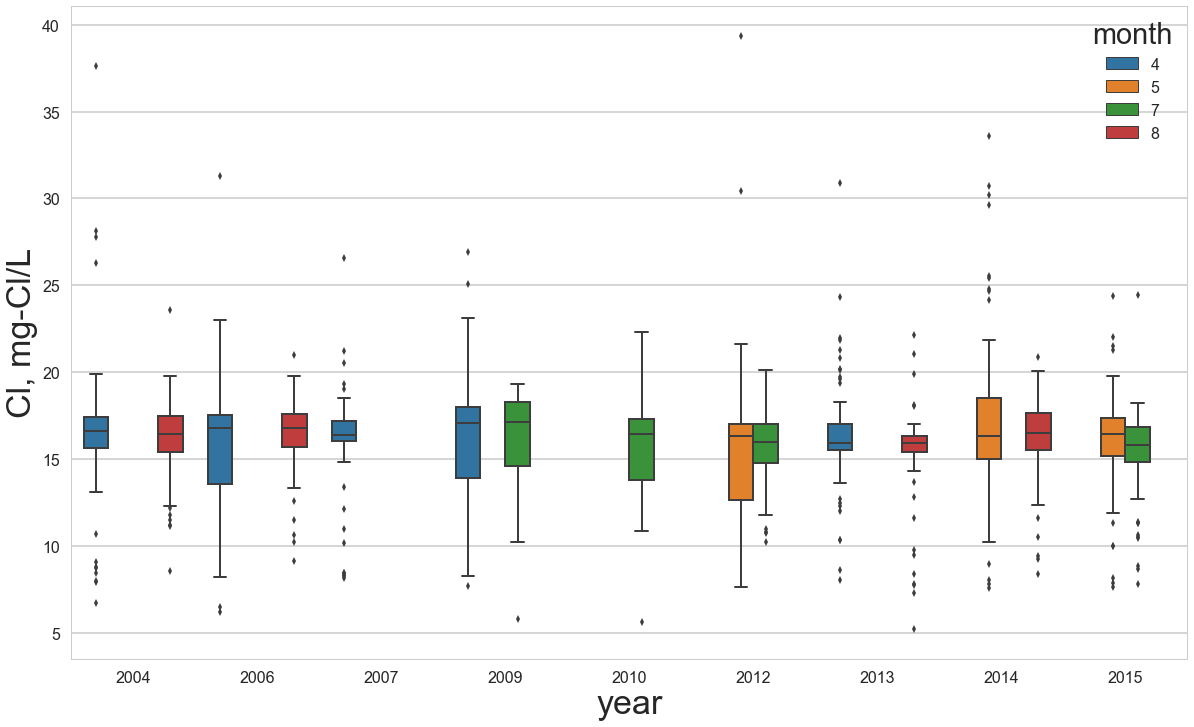

In [10]:
plt.figure(figsize=(20,12))
sns.boxplot(x='year', y='VALUE', hue='month',data=pd.DataFrame(df[df['FULL_NAME'] == 'CHLORIDE'].groupby(['PSN','year', 'month']).mean()[['VALUE']]).reset_index())
# plt.ylim(0, 0.05)
plt.ylabel('Cl, mg-Cl/L')

Text(0,0.5,'CHLOROPHYLL A UNCORRECTED INTEGRATED, ug/L')

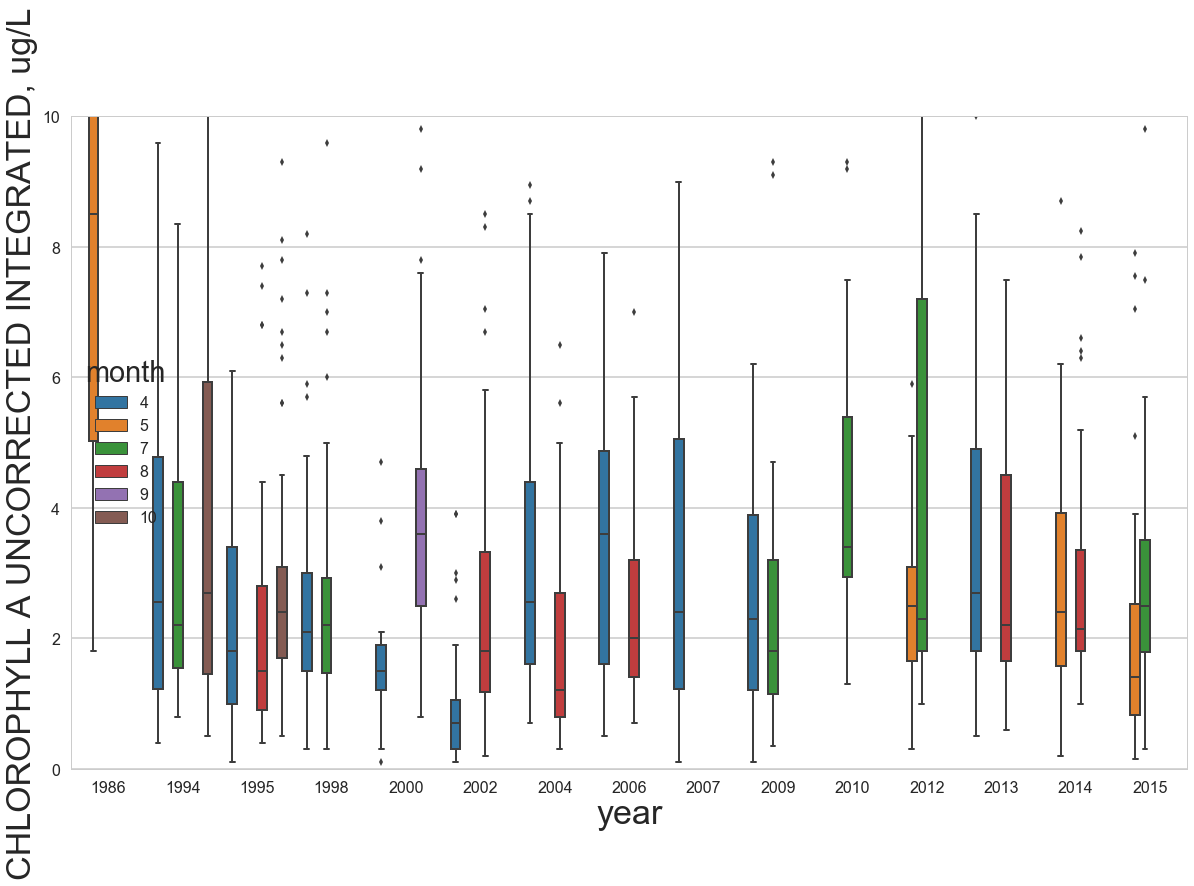

In [11]:
plt.figure(figsize=(20,12))
sns.boxplot(x='year', y='VALUE', hue='month',data=pd.DataFrame(df[df['FULL_NAME'] == 'CHLOROPHYLL A UNCORRECTED INTEGRATED'].groupby(['PSN','year', 'month']).mean()[['VALUE']]).reset_index())
plt.ylim(0, 10)
plt.ylabel('CHLOROPHYLL A UNCORRECTED INTEGRATED, ug/L')

In [12]:
# df.pivot_table(aggfunc=lambda x: len(x.unique()))
df.groupby(['FULL_NAME'])['PSN'].count()

FULL_NAME
ALUMINUM                                     145
ALUMINUM                                      24
AMMONIA FIL. INTEGRATED                       61
AMMONIA NITROGEN, SOLUBLE                    419
AMMONIA NITROGEN,SOLUBLE                    1208
CALCIUM                                      879
CALCIUM,FILTERED                             303
CALCIUM,FILTERED ATOMIC ABS.                2536
CARBON,DISSOLVED ORGANIC                     799
CARBON,PARTICULATE ORGANIC                   659
CARBON,PARTICULATE ORGANIC,INTEGRATED       1674
CHLORIDE                                    2021
CHLORIDE,FILTERED                           1712
CHLOROPHYL A, UNCORRECTED                    567
CHLOROPHYLL A CORRECTED INTEGRATED          1565
CHLOROPHYLL A UNCORRECTED INTEGRATED        1664
CHLOROPHYLL A, CORRECTED PHAEOPHYTIN         537
DISSOLVED INORGANIC CARBON                   533
DISSOLVED OXYGEN, PROFILER WQP             15648
FLUORIDE                                    1493
I-NO3+2F N

In [13]:
data = df[(df.PSN==970) & (df.CODE==245)]

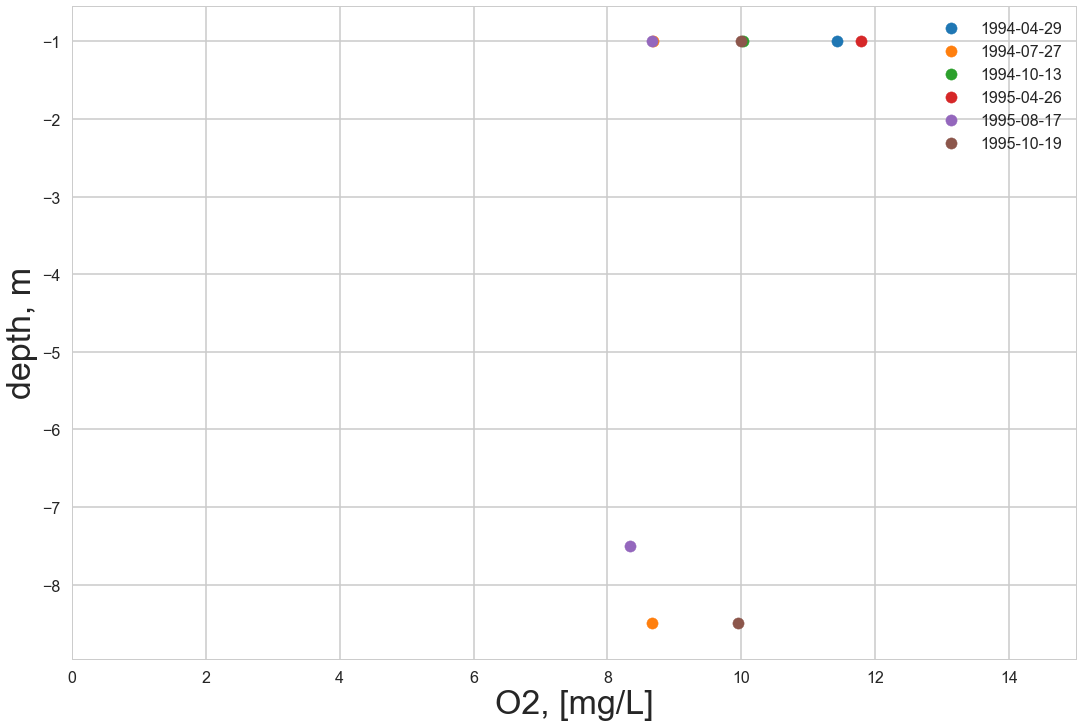

In [14]:
for d in data.STN_DATE.unique()[:6]:
    one_date = data[data.STN_DATE ==d]
#     one_date.sort_values('STN_DATE', inplace=True)
    plt.scatter(one_date['VALUE'], -one_date['DEPTH_FROM'], label=str(d)[:10])
    plt.xlabel('O2, [mg/L]')
    plt.ylabel('depth, m')
    plt.xlim(0,15)
plt.legend()

In [15]:
for c,d in zip( sns.color_palette(), data.DEPTH_FROM.unique()):
    one_date = data[data.DEPTH_FROM ==d]
    one_date.sort(columns='STN_DATE', inplace=True)
#     try:
    plt.plot_date(one_date['STN_DATE'], one_date['VALUE'], color=c, label='_nolegend_')
    plt.plot(one_date['STN_DATE'], one_date['VALUE'], color=c, label=str(d))
#     except:
#         pass
    plt.ylabel('O2, [mg/L]')
#     plt.ylabel('depth, m')
#     plt.xlim(0,15)
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
data_tp = df[(df.PSN==970) & (df.CODE==260)]

In [ ]:
for c,d in zip( sns.color_palette(), data.DEPTH_FROM.unique()):
    one_date = data_tp[data_tp.DEPTH_FROM ==d]
    one_date.sort(columns='STN_DATE', inplace=True)
#     try:
    plt.plot_date(one_date['STN_DATE'], one_date['VALUE'], color=c, label='_nolegend_')
    plt.plot(one_date['STN_DATE'], one_date['VALUE'], color=c, label=str(d))
#     except:
#         pass
    plt.ylabel('TP, [mg-P/L]')
#     plt.ylabel('depth, m')
#     plt.xlim(0,15)
plt.legend()